In [1]:
#谱聚类流程及实现
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline

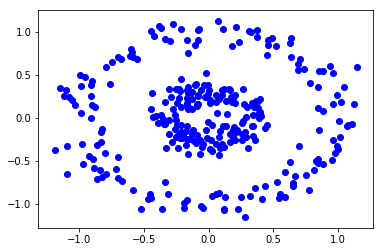

In [2]:
noisy_circles, _ = datasets.make_circles(n_samples=300, noise=0.1, factor=.3, random_state=10)

plt.scatter(noisy_circles[:,0], noisy_circles[:,1], color='b')

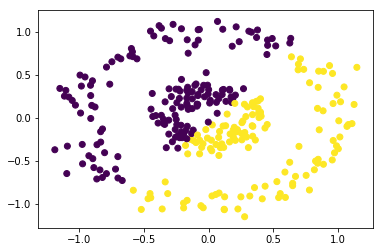

In [3]:
from sklearn.cluster import KMeans

plt.scatter(noisy_circles[:,0], noisy_circles[:,1], c=KMeans(n_clusters=2).fit_predict(noisy_circles))

In [4]:
def knn_similarity_matrix(data, k):
    zero_matrix = np.zeros((len(data), len(data)))
    w = np.zeros((len(data), len(data)))
    
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            zero_matrix[i][j] = zero_matrix[j][i] = np.linalg.norm(data[i] - data[j]) # 计算欧式距离
    
    for i, vector in enumerate(zero_matrix):
        vector_i  = np.argsort(vector)
        w[i][vector_i[1 : k + 1]] = 1

    w = (np.transpose(w) + w)/2
    
    return w

In [5]:
def spectral_clustering(data, k, n):  
    
    # 计算近邻矩阵、度矩阵、拉普拉斯矩阵
    A_matrix = knn_similarity_matrix(data, k) 
    D_matrix = np.diag(np.power(np.sum(A_matrix, axis=1), -0.5))  
    L_matrix = np.eye(len(data)) - np.dot(np.dot(D_matrix, A_matrix), D_matrix)  

    # 计算特征值和特征向量
    eigvals, eigvecs = np.linalg.eig(L_matrix)
    
    # 选择前 n 个最小的特征向量
    indices = np.argsort(eigvals)[: n]  
    k_eigenvectors = eigvecs[:, indices]
    k_eigenvectors
    
    # 使用 K-Means 完成聚类
    clusters = KMeans(n_clusters=n).fit_predict(k_eigenvectors)

    return clusters

In [6]:
sc_clusters = spectral_clustering(noisy_circles, k=5, n=2)
sc_clusters

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

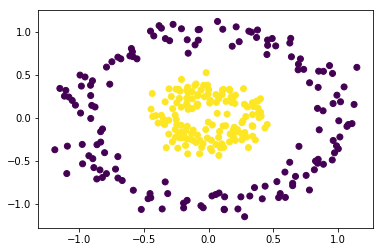

In [7]:
plt.scatter(noisy_circles[:,0], noisy_circles[:,1], c=sc_clusters)

In [8]:
#scikit-learn 中的谱聚类
"""
1. 生成 100px * 100px 的图像
2. 在图像中添加 4 个圆
3. 添加随机噪声点
"""

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)  


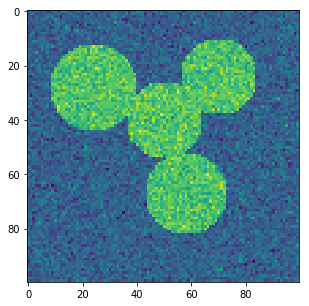

In [9]:
plt.figure(figsize=(5, 5))
plt.imshow(img)

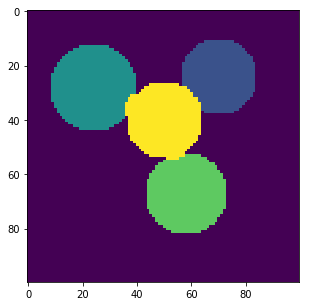

In [10]:
"""
1. 生成 100px * 100px 的图像
2. 在图像中添加 4 个圆
3. 添加随机噪声点
"""

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

graph = image.img_to_graph(img, mask=mask) # 图像处理为梯度矩阵
graph.data = np.exp(-graph.data / graph.data.std()) # 正则化

labels = spectral_clustering(graph, n_clusters=4)
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.figure(figsize=(5, 5))
plt.imshow(label_im)